In [2]:
library(tidyverse)
library(readxl)

In [3]:
yyj <- read_excel("YYJ.xlsx")
head(yyj)

gene_name,0,7,35,63,84
TSPAN6,0.02,0.05,0.08,0.02,0.00
TNMD,0.00,0.00,0.00,0.00,0.00
DPM1,23.80,19.33,27.79,14.55,17.38
SCYL3,8.18,8.39,7.71,6.15,5.34
C1orf112,5.57,4.36,6.25,2.98,3.60
FGR,141.06,85.04,119.37,91.18,99.23


In [4]:
yjs <- read_excel("YJS.xlsx")
head(yjs)

gene_name,0,5,26,49,83,132
TSPAN6,0.08,0.04,0.06,0.02,0.15,0.02
TNMD,0.00,0.00,0.00,0.00,0.00,0.00
DPM1,19.37,25.96,12.03,8.90,15.82,13.60
SCYL3,8.43,10.95,7.06,5.88,5.61,6.01
C1orf112,4.51,2.77,3.24,2.60,2.13,1.57
FGR,253.72,251.19,233.27,218.05,132.15,143.92


In [6]:
pjy <- read_excel("PJY.xlsx")
head(pjy)

gene_name,0,3,7,28,89
TSPAN6,0.05,0.13,0.17,0.15,0.23
TNMD,0.00,0.00,0.00,0.00,0.00
DPM1,25.45,25.23,24.03,9.57,17.52
SCYL3,9.06,8.28,10.29,8.52,7.78
C1orf112,5.94,5.02,5.99,2.92,4.06
FGR,161.68,155.48,173.03,220.30,128.38


In [7]:
ybw <- read_excel("YBW.xlsx")
head(ybw)

gene_name,0,3,8
TSPAN6,0.54,0.36,0.50
TNMD,0.04,0.00,0.00
DPM1,27.16,13.15,22.40
SCYL3,14.19,10.77,11.42
C1orf112,4.15,4.43,5.37
FGR,97.98,119.73,87.73


In [8]:
pjy$sample <- "PJY"
ybw$sample <- "YBW"

In [9]:
pjy.long <- pjy %>% gather(time.point, fpkm, -gene_name, -sample,factor_key = TRUE)
ybw.long <- ybw %>% gather(time.point, fpkm, -gene_name, -sample,factor_key = TRUE)

In [28]:
df <- rbind(pjy.long, ybw.long)
head(df)

gene_name,sample,time.point,fpkm
TSPAN6,PJY,0,0.05
TNMD,PJY,0,0.00
DPM1,PJY,0,25.45
SCYL3,PJY,0,9.06
C1orf112,PJY,0,5.94
FGR,PJY,0,161.68


In [30]:
str(df)

Classes 'tbl_df', 'tbl' and 'data.frame':	462560 obs. of  4 variables:
 $ gene_name : chr  "TSPAN6" "TNMD" "DPM1" "SCYL3" ...
 $ sample    : chr  "PJY" "PJY" "PJY" "PJY" ...
 $ time.point: Factor w/ 6 levels "0","3","7","28",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ fpkm      : num  0.05 0 25.45 9.06 5.94 ...


In [31]:
print(levels(df$time.point))

[1] "0"  "3"  "7"  "28" "89" "8" 


In [32]:
df$time.point <- factor(df$time.point, levels = c('0', '3', '7', '8', '28', '89'))
print(levels(df$time.point))

[1] "0"  "3"  "7"  "8"  "28" "89"


In [33]:
str(df)

Classes 'tbl_df', 'tbl' and 'data.frame':	462560 obs. of  4 variables:
 $ gene_name : chr  "TSPAN6" "TNMD" "DPM1" "SCYL3" ...
 $ sample    : chr  "PJY" "PJY" "PJY" "PJY" ...
 $ time.point: Factor w/ 6 levels "0","3","7","8",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ fpkm      : num  0.05 0 25.45 9.06 5.94 ...


In [50]:
genes.95 <- read.csv("95genes-filtered.txt", stringsAsFactors=FALSE)
head(genes.95)

genes
AFF1
ARID5B
ATG16L2
ATG5
ATXN1
ATXN2


In [51]:
str(genes.95)

'data.frame':	124 obs. of  1 variable:
 $ genes: chr  "AFF1" "ARID5B" "ATG16L2" "ATG5" ...


In [52]:
head(df)

gene_name,sample,time.point,fpkm
TSPAN6,PJY,0,0.05
TNMD,PJY,0,0.00
DPM1,PJY,0,25.45
SCYL3,PJY,0,9.06
C1orf112,PJY,0,5.94
FGR,PJY,0,161.68


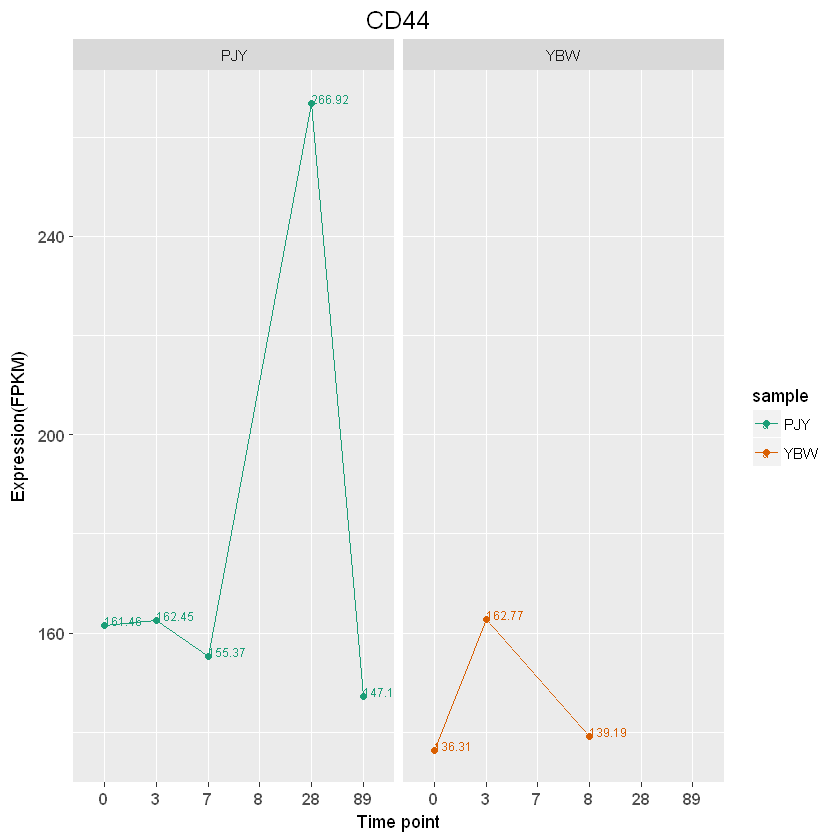

In [45]:
gene <- "CD44"
long <- df %>% filter(gene_name==gene)


ggplot(long, aes(x=time.point, y=fpkm, group= 2, color=sample)) + geom_point() + 
  geom_line() + geom_text(aes(label=fpkm),hjust=0, vjust=0, size=2.5) + 
  scale_color_brewer(palette="Dark2") + 
  ggtitle(gene)  + theme(plot.title = element_text(size=15, hjust=0.5))  + ylab("Expression(FPKM)") + 
  xlab("Time point")  + theme(axis.text=element_text(size=10, face='bold')) + facet_wrap(~sample)


ggsave(paste0("filtered-95genes-plot/",gene,'.png'), width=15, height=10, units="cm")

In [38]:
head(df)

gene_name,sample,time.point,fpkm
TSPAN6,PJY,0,0.05
TNMD,PJY,0,0.00
DPM1,PJY,0,25.45
SCYL3,PJY,0,9.06
C1orf112,PJY,0,5.94
FGR,PJY,0,161.68


In [62]:
for ( i in genes.95$genes) {
    gene <- i
    long <- df %>% filter(gene_name==i)


    ggplot(long, aes(x=time.point, y=fpkm, group= 2, color=sample)) + geom_point() + 
      geom_line() + geom_text(aes(label=fpkm),hjust=0, vjust=0, size=2.5) + 
      scale_color_brewer(palette="Dark2") + 
      ggtitle(gene)  + theme(plot.title = element_text(size=15, hjust=0.5))  + ylab("Expression(FPKM)") + 
      xlab("Time point")  + theme(axis.text=element_text(size=10, face='bold')) + facet_wrap(~sample)


    ggsave(paste0("filtered-95genes-plot/",gene,'.png'), width=15, height=10, units="cm")
    
    }

[1] "AFF1"
[1] "ARID5B"
[1] "ATG16L2"
[1] "ATG5"
[1] "ATXN1"
[1] "ATXN2"
[1] "BACH2"
[1] "BANK1"
[1] "BCL6"
[1] "BLK"
[1] "CCL22"
[1] "CD14"
[1] "CD163"
[1] "CD226"
[1] "CD4"
[1] "CD44"
[1] "CD80"
[1] "CDKN1B"
[1] "CIITA"
[1] "CLEC16A"
[1] "COG6"
[1] "CREBL2"
[1] "CSK"
[1] "CXCR5"
[1] "CXorf21"
[1] "DGKQ"
[1] "DHCR7"
[1] "DNASE1"
[1] "DRAM1"
[1] "EDEM3"
[1] "ELF1"
[1] "ENTHD1"
[1] "ETS1"
[1] "FAM86B3P"
[1] "FAM98B"
[1] "FCGR2A"
[1] "FCGR3B"
[1] "FCRL4"
[1] "FOXP3"
[1] "GALC"
[1] "GATA3"
[1] "GPR19"
[1] "GRAP2"
[1] "GRB2"
[1] "GTF2I"
[1] "GTF2IRD1"
[1] "HLA-DRB1"
[1] "ICAM1"
[1] "IFIH1"
[1] "IFNG"
[1] "IKBKE"
[1] "IKZF1"
[1] "IKZF2"
[1] "IKZF3"
[1] "IL10"
[1] "IL12A"
[1] "IL12B"
[1] "IL12RB2"
[1] "IL2"
[1] "IL21"
[1] "IL2RA"
[1] "IRAK1"
[1] "IRF5"
[1] "IRF7"
[1] "IRF8"
[1] "ITGAM"
[1] "JAK2"
[1] "JAZF1"
[1] "LBH"
[1] "LPP"
[1] "LRRC16A"
[1] "LYN"
[1] "LYST"
[1] "MIR146A"
[1] "MRC1L1"
[1] "MYNN"
[1] "NCF2"
[1] "OLIG3"
[1] "P2RY2"
[1] "PAPOLG"
[1] "PCNXL3"
[1] "PDCD1"
[1] "PDHX"
[1] "PKIA

In [63]:
yyj$sample <- "YYJ"
yjs$sample <- "YJS"


yyj.long <- yyj %>% gather(time.point, fpkm, -gene_name, -sample,factor_key = TRUE)
yjs.long <- yjs %>% gather(time.point, fpkm, -gene_name, -sample,factor_key = TRUE)

In [64]:
df <- rbind(yyj.long, yjs.long)

str(df)

Classes 'tbl_df', 'tbl' and 'data.frame':	636020 obs. of  4 variables:
 $ gene_name : chr  "TSPAN6" "TNMD" "DPM1" "SCYL3" ...
 $ sample    : chr  "YYJ" "YYJ" "YYJ" "YYJ" ...
 $ time.point: Factor w/ 10 levels "0","7","35","63",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ fpkm      : num  0.02 0 23.8 8.18 5.57 ...


In [65]:
print(levels(df$time.point))

 [1] "0"   "7"   "35"  "63"  "84"  "5"   "26"  "49"  "83"  "132"


In [66]:
df$time.point <- factor(df$time.point, levels = c('0', '5', '7', '26', '35', '49','63', '83', '84', '132'))

In [67]:
str(df)

Classes 'tbl_df', 'tbl' and 'data.frame':	636020 obs. of  4 variables:
 $ gene_name : chr  "TSPAN6" "TNMD" "DPM1" "SCYL3" ...
 $ sample    : chr  "YYJ" "YYJ" "YYJ" "YYJ" ...
 $ time.point: Factor w/ 10 levels "0","5","7","26",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ fpkm      : num  0.02 0 23.8 8.18 5.57 ...


In [71]:
for ( i in genes.95$genes) {
    gene <- i
    long <- df %>% filter(gene_name==i)


    ggplot(long, aes(x=time.point, y=fpkm, group= 2, color=sample)) + geom_point() + 
      geom_line() + geom_text(aes(label=fpkm),hjust=0, vjust=0, size=2.5) + 
      scale_color_brewer(palette="Dark2") + 
      ggtitle(gene)  + theme(plot.title = element_text(size=15, hjust=0.5))  + ylab("Expression(FPKM)") + 
      xlab("Time point")  + theme(axis.text=element_text(size=10, face='bold')) + facet_wrap(~sample)


    ggsave(paste0("filtered-95genes-plot/urgent/",gene,'.png'), width=15, height=10, units="cm")
    
    }